In [ ]:
# %loadpy PTVpost.py

In [2]:
from matplotlib import pyplot
import sys, os
# sys.path.insert(0,'/Users/alex/Documents/OpenPTV/postptv/')

In [3]:
from flowtracks.io import iter_trajectories_ptvis # note use of the iterator rather than a list implementation
import timeit
import numpy as np

In [9]:
#----parameters
inName = "./test_data/ptv_is.%d" # the directory with the input files
traj_min_len = 15# 40 # Trajectories longer than fixed frames, according to mean velocity. 8mm

#----cal traj.
timer_start = timeit.default_timer()
trajects = iter_trajectories_ptvis(inName, first=101000, last=101024, traj_min_len=traj_min_len)
timer_end = timeit.default_timer()
print('Elapsed time = ',round((timer_end-timer_start),5), ' sec')

Elapsed time =  5e-05  sec


total number of trajectories 145


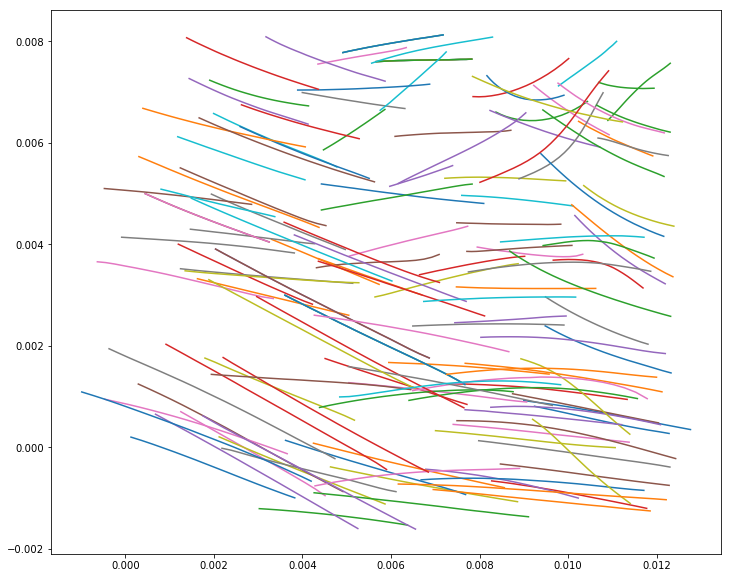

In [10]:
%matplotlib inline
pyplot.figure(figsize = (12, 10))
ntraj = 0
for tr in trajects: # generate one trajectory per loop call
    pos =  tr.pos()
    trajX = pos[:,0]
    trajY = pos[:,1]
    pyplot.plot(trajX, trajY, '-')
    ntraj += 1

# pyplot.show() 
print('total number of trajectories %d' % ntraj)

In [ ]:
# Important note, if you want to process some other data, e.g. velocities, you have to restart
# the function call
# trajects = iter_trajectories_ptvis(inName, first=10001, last=10019, traj_min_len=traj_min_len)
# as the previous one run through all the trajectories and stopped at the last one. There is no way
# to rewind the function. The solutions are:
# 1. convert iterator to the list of data you need, e.g. positions, velocities in one single loop
# 2. keep a copy to the iterator using itertools.tee -  https://docs.python.org/2/library/itertools.html#itertools.tee